In [1]:
# Importerer biblotek som skal brukes til oppgaven
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from pycaret.regression import *
from sklearn.ensemble import GradientBoostingRegressor

# Predict house price

Innlevering 1: Torje Gloppholm Sylta.

Predict the price of a housesale in Ames, Iowa between 2006 and 2010 with the help of 79 variables

# Get the data 

In [2]:
#Importerer dataen som skal brukes i oppgaven til å trene og teste 
train = pd.read_csv("C:\\Users\\torje\\Husverdi\\data\\train.csv")
test = pd.read_csv("C:\\Users\\torje\\Husverdi\\data\\test.csv")
sampleSubmission = pd.read_csv("C:\\Users\\torje\\Husverdi\\data\\sample_submission.csv")
train_pycaret = train

# Inspect the data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Får her en oversikt over alle attributtene. Er 81 attributt til sammen, 3 av dem er av typen float64, 35 er av typen int64
#og 43 er av typen object.
# Attributtet Id brukes bare for å identifisere rekkene og skal trene opp en algoritme til å gjette hva attributtet 
# "SalePrice" er. Har derfor 79 attributt å bruke til å spå prisen på et hus. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Få her en tabell over alle attributtene som har manglende verdier i noen rekker. F.eks. har attributtet "Electrical" bare 
#en rekke som mangler verdi på attributtet, men attributtet "PoolQC" har 1453 rekker som mangler verdi på attributtet.
#Er tilsammen 19 attributt som mangler verdier.
attributtSomMangler = train.isnull().sum().sort_values(ascending=False).to_frame()
attributtSomMangler = attributtSomMangler.rename(columns= {0: 'Antall rekker som mangler attributtet'})

for i, rekke in attributtSomMangler.iterrows():
    if rekke["Antall rekker som mangler attributtet"] == 0:
        attributtSomMangler.drop(i, inplace=True)

attributtSomMangler

,Antall rekker som mangler attributtet
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [6]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [7]:
#ProfileReport(train)

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
sampleSubmission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Explore the data

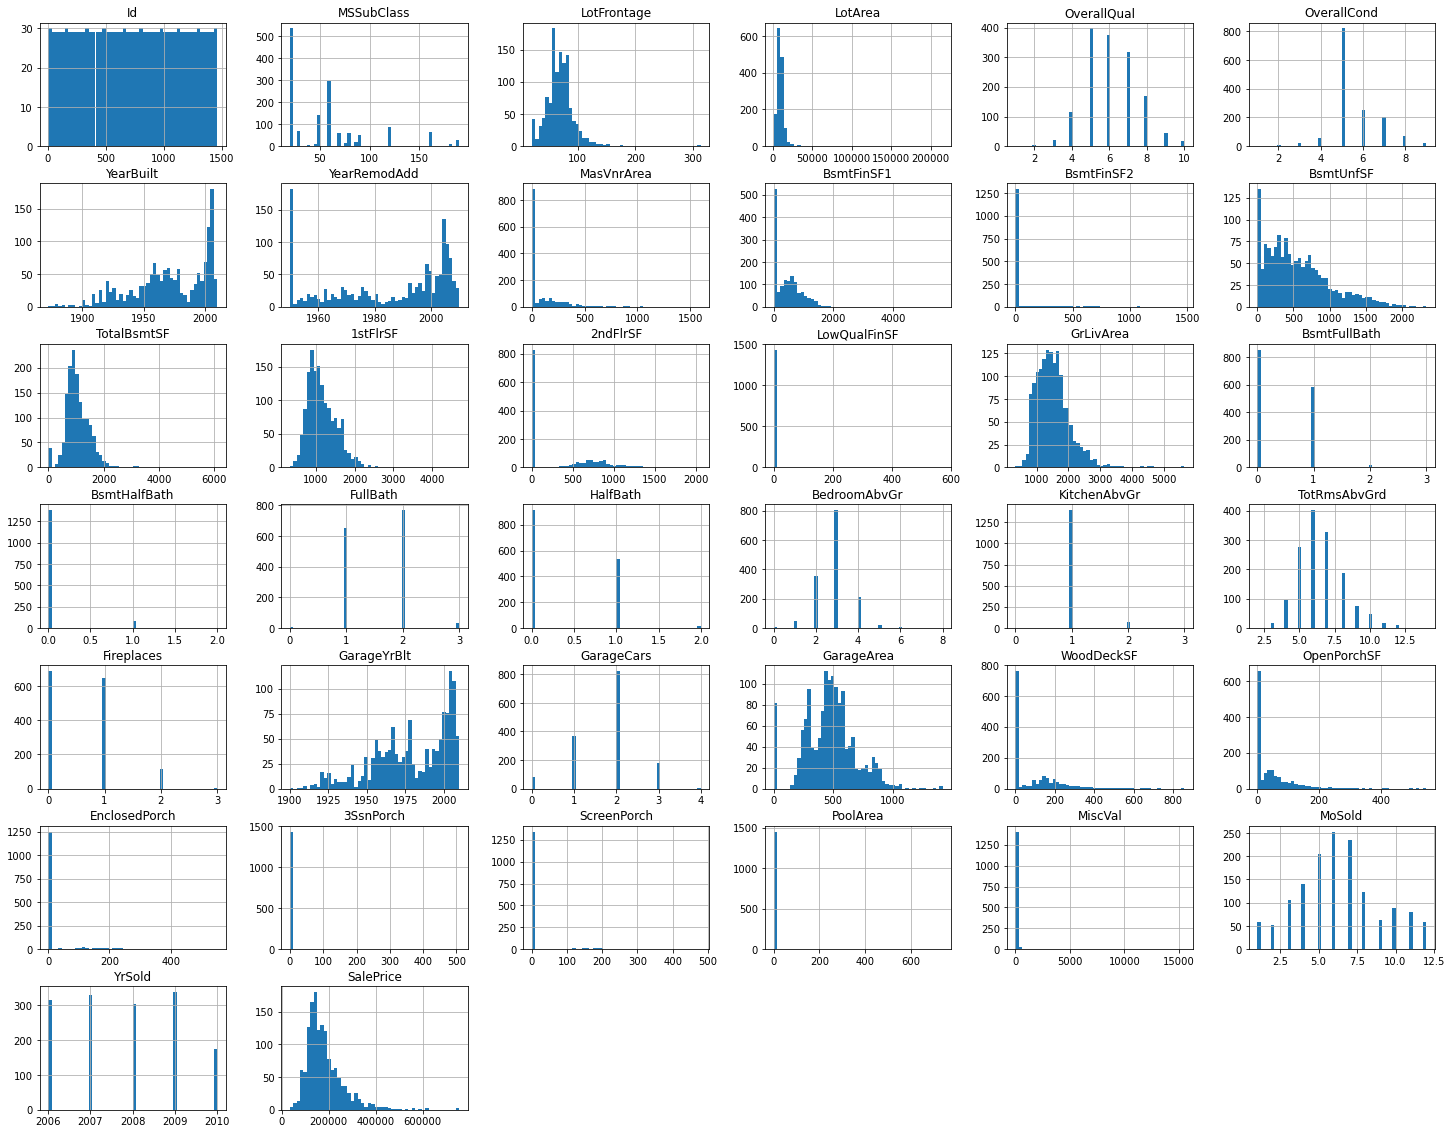

In [10]:
#Histogram over dei numeriske attributtene
train.hist(bins=50, figsize=(25,20))
plt.show()

In [11]:
#Sjekker korrelasjon mellom "SalePrice" og de andre numeriske attributtene.
#Som forventeser ser jeg at "SalePrice" har høy korrelasjon med attributt som omhandler størrelse på huset, garasje, antall rom
#og rom areal. Altså at høyere pris tilsvarer større areal.
#Også høy korrelasjon med attributt som sier noe om kvalitet, hvor nytt det er og om man har slike tillegsting på huset som
#peis og terrasse
# og om 

train.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

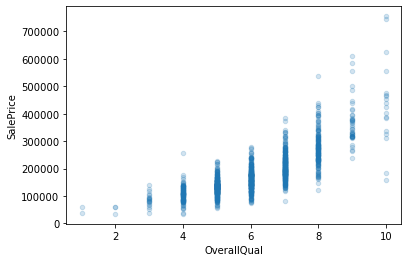

In [12]:
#Høyere kvalitet gir høyere pris
train.plot(kind='scatter', x='OverallQual', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

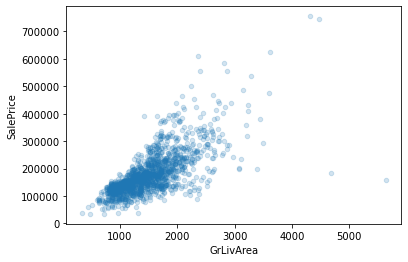

In [13]:
#Salgspris og areal over bakkenivå
#Høyere pris gir ofte større areal
train.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

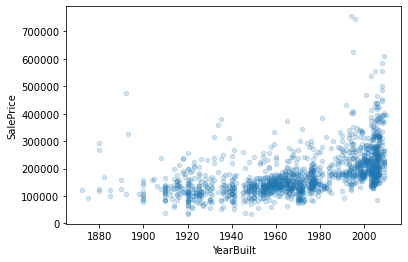

In [14]:
#Nyere hus er som regel dyrere
train.plot(kind='scatter', x='YearBuilt', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

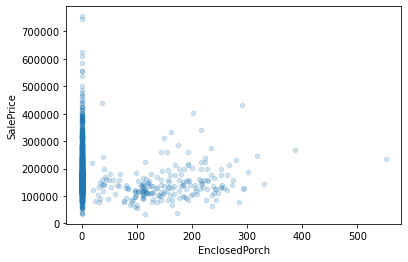

In [15]:
#Salgspris og areal av lukket veranda
#"EnclosedPorch" var en av de numeriske attributtene som hadde lavest korrelasjon med "SalePrice". Er nok ikke så vanlig
#å ha en lukket veranda så det er veldig mange hus på 0. Virker og som at lukket veranda er mest vanlig på de billigste husene
train.plot(kind='scatter', x='EnclosedPorch', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

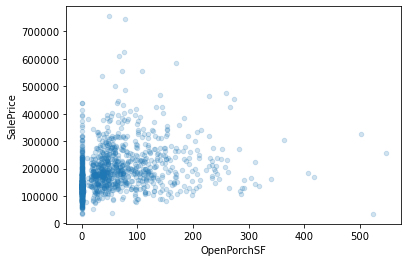

In [16]:
#Salgspris og areal av åpen terrase
#Er mer vanlig med åpen terrase. Ser ut som at de billigste husene (de under 300 000$) dominerer både husene uten terrasse og de med størst terrase
#Kanskje de billigste husene nærme byenkjernen ikke har terrase, mens de billigste husene som ligger utenfor byen 
#der det er god plass har store terrasser. 
train.plot(kind='scatter', x='OpenPorchSF', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

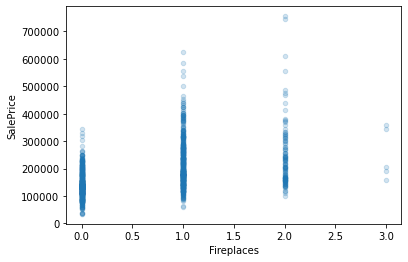

In [17]:
#Salgspris og antall peiser
train.plot(kind='scatter', x='Fireplaces', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

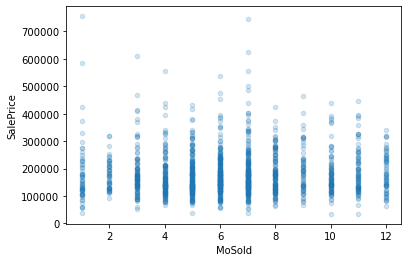

In [18]:
#Salgspris og måned solgt
#Når på året man selger huset sitt har ikke mye å si på prisen
train.plot(kind='scatter', x='MoSold', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

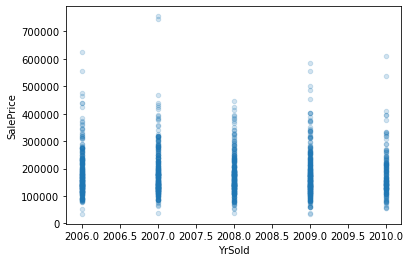

In [19]:
#Treningsettet inneholder bare hus som er solgt mellom 2006 og 2010
#Kan ikke trene opp en model på dette treningsettet til å gjette hva prisen på et hus i dag vil gå for da den mest sannsynlig 
#vil gi lavere pris en hva det faktisk vil gå for. Dette er fordi dagens priser ikke er dei samme som i perioden 2006-2010.
#F.eks. har boligprisene i hele Norge økt med 130% siden 2006
#https://www.smartepenger.no/105-kalkulator/873-boligprisutvikling
train.plot(kind='scatter', x='YrSold', y='SalePrice', alpha=0.2)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

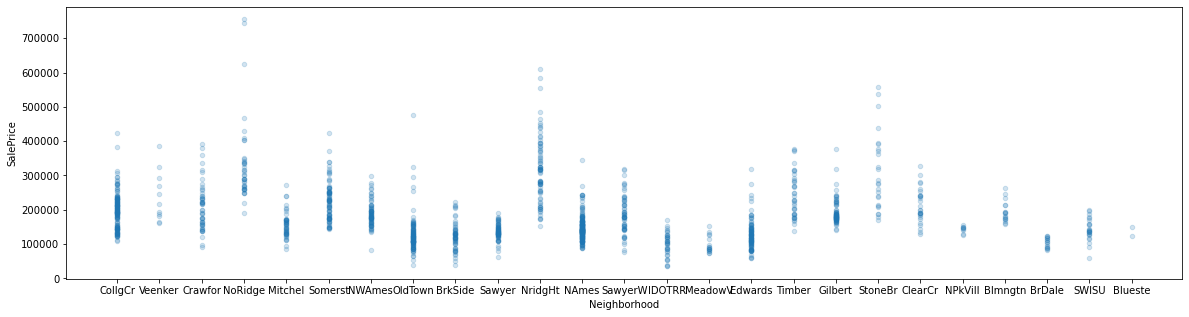

In [20]:
#Salgspris og område
#Hvilket område huset er i har betydning på prisen. F.eks. et hus i "Blmngtn" vil mest sannsynlig ha en salgspris mellom
# 150,000$ og 250,000$
train.plot(kind='scatter', x='Neighborhood', y='SalePrice', alpha=0.2, figsize=(20,5))

In [21]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

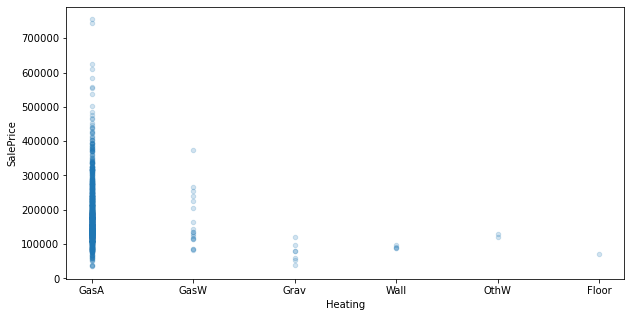

In [22]:
#Salgspris og type oppvarming av hus
#Ser ut som hva type oppvarming har noe betydning på pris. Hvis det blir brukt "GasA" kan prisen være hva som helst, men 
#hvis de bruker "gravity furnace" vil prisen mest sannsynlig ligge på under 150,000$
train.plot(kind='scatter', x='Heating', y='SalePrice', alpha=0.2, figsize=(10,5))

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

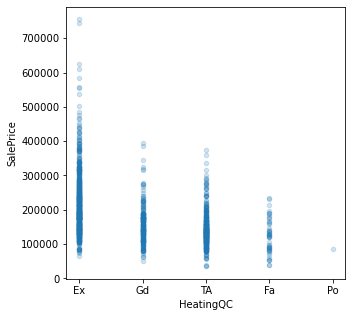

In [23]:
#Salgspris og kvalitet på oppvarming av hus
#Hvis oppvarmingen av huset er dårlig så vil prisen bli lavere
train.plot(kind='scatter', x='HeatingQC', y='SalePrice', alpha=0.2, figsize=(5,5))

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

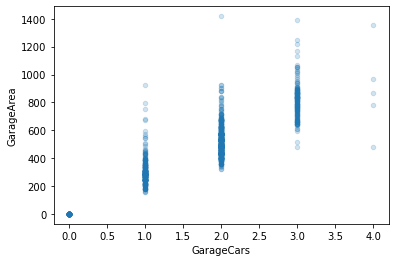

In [24]:
#Antall biller og areal av garasje
#Ikke så overaskende så gir større plass i garasje plass til flere biler
train.plot(kind='scatter', x='GarageCars', y='GarageArea', alpha=0.2)

# Prepare the data

In [25]:
#Har noen attributter som mangler verdier. Velger derfor å fjerne de attributtene der over 10% av 
#rekkene mangler verdi på attributtet. 10% tilsvarer 146 rekker. ((1460/100)*10 = 146)
#6 attributt blir fjernet fra tabellen. Sitter da igjen med 13 attributt som mangler verdier.

train = train.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"])

#5 av dei 13 attributtene som mangler verdier har noe med garasje å gjøre. Alle fem attributtene mangler 81 verdier
#så vi kan trygt anta at det er de samme 81 rekkene som mangler disse 5 attributtene. Vi har allerede to garasje attributt,
#"garageCars" og "GarageArea", som har alle verdiene og som inneholder den viktigste informasjonen over en garasje. Fjerner 
#derfor disse 5 garasje attributtene som mangler verdier

train = train.drop(columns=["GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual"])

#5 av dei 8 attributtene som er igjen har noe med kjellere å gjøre. Det samme som gjelder for garasje gjelder også her. 
#Ser ut som at de er dei samme rekkene som mangler de ulike kjeller attributtene. Vi har også flere kjeller attributt
#i tabellen som ikke mangler noen verdien, men som allerede dekker noe lignende som de attributtene som mangler verdier gjør
#Fjerner derfor også disse 5 attributtene

train = train.drop(columns=["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"])

In [26]:
train["MasVnrArea"].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [27]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
#Har 3 attributter igjen som mangler verdier, to av disse er MasVnrArea og MasVnrType. Begge mangler 8 verdier. Velger her
#å sette inn den hyppigste verdien der det mangler verdi. 
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [29]:
#Sitter nå igjen med bare et attributt som mangler verdier. Attributtet er "electrical" og det mangler bare en verdi. 
#Ettersom det bare er 1 rekke som mangler attributtet så er det letteste å gjøre bare å fjerne helle rekken.

train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [30]:
#Endrer typen til alle attributt i tabellen som er av typen "object" over til å bli av typen "int64". Deler opp "object"
#attributtene opp i to deler. I den ene delen er det attributt hvor de ulike verdiene i attributtet ikke har noen 
#verdi forskjell mellom hverandre, altså at en av verdiene ikke er større/mindre eller bedre/dårligere enn de andre verdiene.
#Bruker "one hot encoding" på dei.
#I den andre delen er resten av attributtene, altså dei hvor de ulike verdiene i attributtet er større/mindre 
#eller bedre/dårligere enn de andre verdiene. Bruker "ordinal encoding" på dei.

#Endte opp med å "ordinal encoding" på alle object attributtene ettersom eg ikke fikk til å bruke "one hot encoding" 
#i distribusjonen


one_hot_attributt = ["MSZoning", "Street", "LotShape", "Utilities","LandContour",
                    "LotConfig", "LandSlope", "Neighborhood", "BldgType", "Condition1", "Condition2",
                    "HouseStyle", "RoofStyle", "RoofMatl", "MasVnrType", "Exterior1st", "Exterior2nd",
                    "Foundation", "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive",
                    "SaleType", "SaleCondition"]

#oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(train[one_hot_attributt]))
#oh_cols_train.index = train.index
#num_train = train.drop(one_hot_attributt, axis=1)
#oh_train = pd.concat([num_train, oh_cols_train], axis=1)
#train = oh_train


ordinal_attributt= ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

attri = ["MSZoning", "Street", "LotShape", "Utilities","LandContour",
                    "LotConfig", "LandSlope", "Neighborhood", "BldgType", "Condition1", "Condition2",
                    "HouseStyle", "RoofStyle", "RoofMatl", "MasVnrType", "Exterior1st", "Exterior2nd",
                    "Foundation", "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive",
                    "SaleType", "SaleCondition", "ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

for att in attri:
    le = LabelEncoder()
    le.fit(train[att])
    train[att] = le.transform(train[att])


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int32  
 5   LotShape       1459 non-null   int32  
 6   LandContour    1459 non-null   int32  
 7   Utilities      1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  Condition2     1459 non-null   int32  
 13  BldgType       1459 non-null   int32  
 14  HouseStyle     1459 non-null   int32  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [32]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [33]:
#Fjerner id attributtet
train = train.drop('Id', axis=1)

In [34]:
#Splitter opp treningsettet i to tabeller. X inneholder treningsettet uten "SalePrice" og y inneholder bare "SalePrice"
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [35]:
#Splitter deretter desse to tabellene opp i fire nye tabeller der X_train og y_train har 75% av dataen og X_test og y_test har 25%
#Grunnen til at eg splitter opp er for at X_train og y_train skal brukes til å trene opp algoritmen med mens
# X_test og y_test skal brukes for å teste hvor nøyaktig den opptrente algoritmen er.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
#Mange algoritmer funker ofte dårlig på uskalert data ettersom de ulike verdiene i attributtene kan ha store forskjeller mellom seg
# Hvis de ulike verdiene i attributtene er mer like vil algoritmen bli trent raskere og bedre 
std = StandardScaler()
X_train_skalert = std.fit_transform(X_train)
X_test_skalert = std.transform(X_test)

# Modelling

Prøver en del ulike modeller

Linear regression

In [37]:
#Trener her opp algoritmen linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

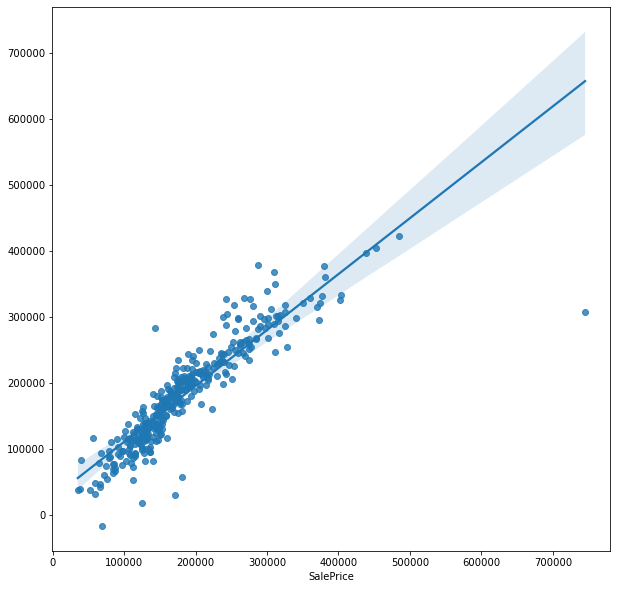

In [38]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred_lr)
plt.show()

In [39]:
# RMSE for Linear regression
mean_squared_error(y_test, y_pred_lr, squared=False)

36948.837822859634

RandomForestRegressor

In [40]:
#Trener her opp algoritmen RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_skalert, y_train)
y_pred_rfr = rf_reg.predict(X_test_skalert)

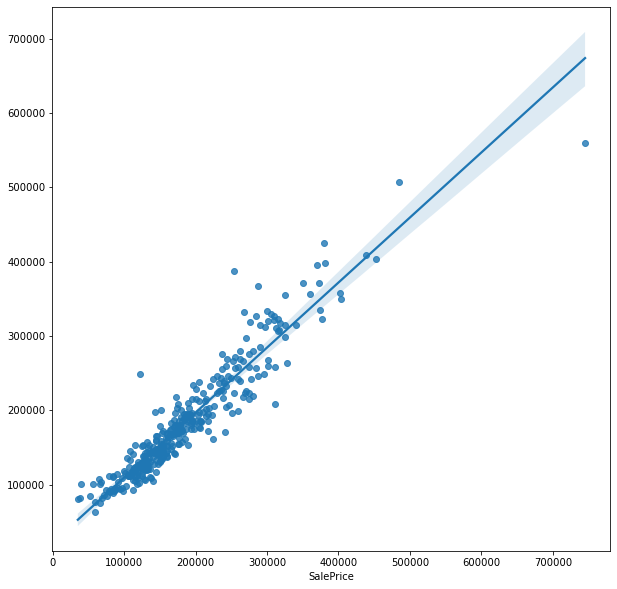

In [41]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred_rfr)
plt.show()

In [42]:
# RMSE for RandomForestRegressor
mean_squared_error(y_test, y_pred_rfr, squared=False)

26399.165513095773

In [43]:
#Finner bedre hyperparametere for RandomForestRegressor ved hjelp av gridsearch
rfr_fineTuned = RandomForestRegressor(random_state=42)

parameters = {'max_features' : [30, 40, 50, 55, 60, 65, 70],
               'n_estimators': [10, 15, 20, 25, 30, 40, 50, 60, 80],
                  'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                  'bootstrap': [True, False]
                 }

grid_rfr = GridSearchCV(estimator=rfr_fineTuned, param_grid = parameters, scoring='neg_root_mean_squared_error', cv = 5, n_jobs=-1)
grid_rfr.fit(X_train_skalert, y_train)

grid_rfr.best_params_

{'bootstrap': True, 'max_depth': 11, 'max_features': 30, 'n_estimators': 40}

In [44]:
rfr_best_parameters = RandomForestRegressor(n_estimators=50, max_depth=11, max_features=55, bootstrap = True, random_state=42)
rfr_best_parameters.fit(X_train_skalert, y_train)
y_pred_rfr_best_parameters = rfr_best_parameters.predict(X_test_skalert)

# RME
print("RMSE for RandomForestRegressor etter gridsearch")
mean_squared_error(y_test, y_pred_rfr_best_parameters, squared=False)

RMSE for RandomForestRegressor etter gridsearch


25738.492465910265

Gradient boosting

In [45]:
gb = GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.2)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

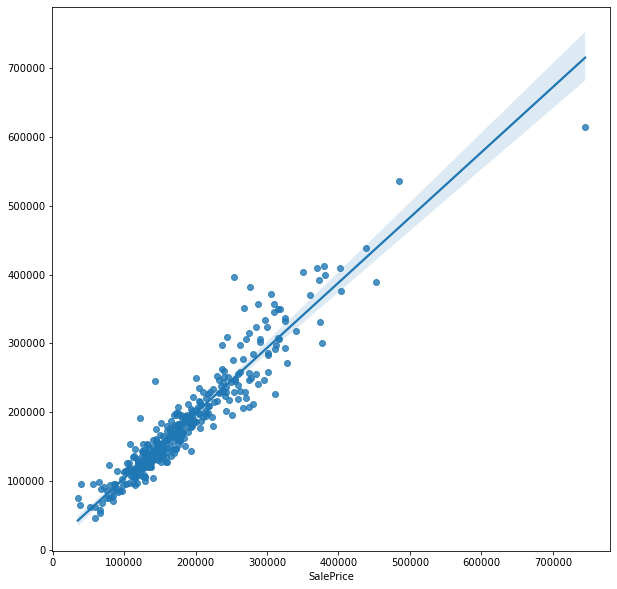

In [46]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred_gb)
plt.show()

In [47]:
# RMSE
mean_squared_error(y_test, y_pred_gb, squared=False)

25891.115415088654

XGBoost

In [48]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train) 
y_pred_xgb = xgb_reg.predict(X_test)

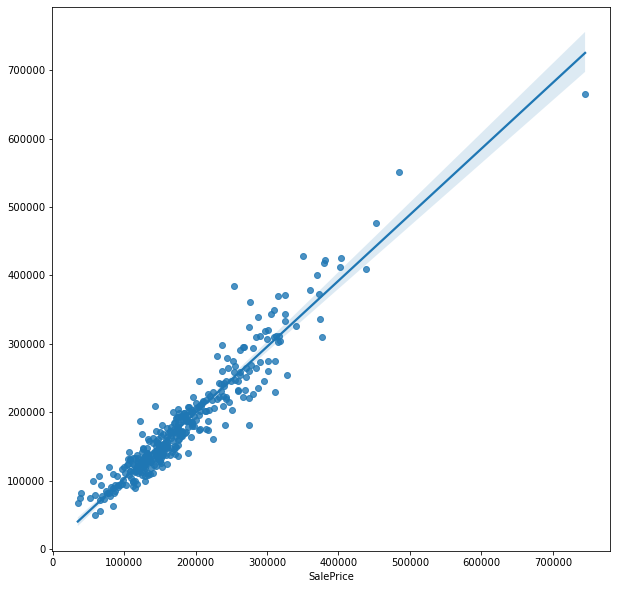

In [49]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred_xgb)
plt.show()

In [50]:
# RMSE for XGBooster
mean_squared_error(y_test, y_pred_xgb, squared=False)

24590.336427555776

In [51]:
#Finner bedre hyperparametere for XGBoost ved hjelp av gridsearch
xgb_fineTuned = XGBRegressor()

parameters = {'max_depth' : [3, 4, 5, 6, 7, 8],
               'n_estimators': [50, 100, 150, 200, 250, 300],
                  'eta': [0.01, 0.05,0.1, 0.2, 0.3, 0.4],
                  'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'colsample_bytree': [0.5, 0.75, 1]       
              
                 }

grid_xgb = GridSearchCV(estimator=xgb_fineTuned, param_grid = parameters, scoring='neg_root_mean_squared_error', cv = 5, n_jobs=-1)
grid_xgb.fit(X_train, y_train) 

grid_xgb.best_params_

KeyboardInterrupt: 

In [52]:
xgb_best_parameters = XGBRegressor(n_estimators=250, max_depth=4, subsample=1, eta = 0.1, colsample_bytree=0.5)
xgb_best_parameters.fit(X_train, y_train) 
y_pred_xgb_best_parameters = xgb_best_parameters.predict(X_test)

# RME
print("RMSE for XGBoost etter gridsearch")
mean_squared_error(y_test, y_pred_xgb_best_parameters, squared=False)

RMSE for XGBoost etter gridsearch


24567.740652743705

Eksporterer den beste modellen

In [53]:
import joblib

In [54]:
joblib.dump(xgb_best_parameters, "ferdig_model_huspris.joblib")

['ferdig_model_huspris.joblib']

Kaggle:

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [56]:
test_fjernet_attr = test.drop(columns=["Id", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1",
                                       "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage", 
                                       "GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual"])

In [57]:
attri = ["MSZoning", "Street", "LotShape", "Utilities","LandContour",
                    "LotConfig", "LandSlope", "Neighborhood", "BldgType", "Condition1", "Condition2",
                    "HouseStyle", "RoofStyle", "RoofMatl", "MasVnrType", "Exterior1st", "Exterior2nd",
                    "Foundation", "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive",
                    "SaleType", "SaleCondition", "ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

for att in attri:
    le = LabelEncoder()
    le.fit(test_fjernet_attr[att])
    test_fjernet_attr[att] = le.transform(test_fjernet_attr[att])


In [61]:
test_y_xgb_reg =xgb_best_parameters.predict(test_fjernet_attr)

In [62]:
submission_xgb = pd.DataFrame({'Id': test.Id, 'SalePrice': test_y_xgb_reg})

In [63]:
submission_xgb.head()

,Id,SalePrice
0,1461,126411.335938
1,1462,156791.375000
2,1463,179621.515625
3,1464,195181.203125
4,1465,193198.828125


In [64]:
submission_xgb.to_csv('submission_xgb.csv', index=False)

XGBoosting endte opp med en score på 15207.66545 på kaggle. Dette er ca 3600 høyere en de beste på listen hvis vi ser vekk fra de med en score på 0 og to stykk under 10000. Fikk plasseringen 2306 av 53215 så er fornøyd med resultatet.

# Pycaret 

Skulle bruke pycaret til å løse oppgaven, men rett før eg blei ferdig fikk eg noen problemer. Trur problemen kommer fra at et eller flere av biblotekene ikke funker i den python versjonen eg har. Prøvde å løse det men fikk det ikke til.

In [ ]:
train_pycaret = train_pycaret.drop('Id', axis=1)

In [ ]:
data = setup(data=train_pycaret, target='SalePrice', fold_shuffle=True, session_id=1000)

In [ ]:
#Liste over ulike modeller
models()

In [ ]:
#Finner de beste modelene, tar dei 5 beste
best_models = compare_models(n_select=5, sort='RMSE')

Hyperparameter tuning

In [ ]:
#Hyperparameter tuning av catboost regressor
tuned_catboost = tune_model(best_models[0], optimize = 'RMSE')

In [ ]:
#Hyperparameter tuning av gradient boosting regressor
tuned_gbr = tune_model(best_models[1], optimize = 'RMSE')

In [ ]:
#Hyperparameter tuning av Light Gradient Boosting Machine
tuned_lightgbm = tune_model(best_models[2], optimize = 'RMSE')

In [ ]:
#Hyperparameter tuning av Random Forest Regressor
tuned_rf = tune_model(best_models[3], optimize = 'RMSE')

In [ ]:
#Hyperparameter tuning av Extreme Gradient Boosting
tuned_xgboost = tune_model(best_models[4], optimize = 'RMSE')

In [ ]:
#Sammenligner de innstilte modellene
compare_models(include=[tuned_catboost, tuned_gbr, tuned_lightgbm, tuned_rf, tuned_xgboost], sort='RMSE')

In [ ]:
#Kombinerer alle 

= blend_models(estimator_list=best_models)

In [ ]:
#Trener opp en blender
blended = stack_models(estimator_list=best_models, optimize='RMSE')

In [ ]:
#Sammenligner alle modellene
compare_models(include=[tuned_catboost, tuned_gbr, tuned_lightgbm, tuned_rf, tuned_xgboost, 
                       best_models[0],best_models[1], best_models[2], best_models[3], best_models[4],
                        ensemble, blended], sort='RMSE')

Den beste modelen er den beste av dei første modelene eg lagde som ikke er instillt eller kombinert

In [ ]:
beste_model = best_models[0]

Evaluer resultatet

In [ ]:
plot_model(beste_model)

In [ ]:
plot_model(beste_model, 'error')

In [ ]:
plot_model(beste_model, 'feature')

In [ ]:
print(beste_model)

In [ ]:
y_pred =predict_model(beste_model);

In [ ]:
test_prediction = predict_model(beste_model, data=test)
test_prediction

In [ ]:
ferdig_model = finalize_model(beste_model)

In [ ]:
#Eksporterer modelen
save_model(ferdig_model, 'ferdig_model_huspris')